In [22]:
import pyes
import json

host = '140.118.155.14:9200'

fid1 = '143039229176602'
fid2 = '119474188105563'

def fans(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    qsearch = pyes.query.Search(tq) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='fanpage')
    for fidpid_summary in result:
        count = fidpid_summary['likes_count']
        print fid + ',' + str(count)
        count = int(count)
        return count
        
fans(fid1)
fans(fid2)

FanpageLikes = [753040, 464181]

143039229176602,753040
119474188105563,464181


In [24]:
def posts(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    qsearch = pyes.query.Search(tq) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='post')
    print fid + ',' + str(len(result))

posts(fid1)
posts(fid2)

TotalCountFid1 = 990
TotalCountFid2 = 1467

NumofPost = [1097, 1678]

143039229176602,1097
119474188105563,1678


In [66]:
def commentsPerPost(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(tagg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
    for fidpid_summary in result.aggs["pid"]["buckets"]:
        print fid + ',' + str(fidpid_summary["doc_count"])

commentsPerPost(fid1)
commentsPerPost(fid2)

Fid1CPP = [15460, 7563, 3534, 3273, 3068, 2967, 2783, 1929, 1896, 1592, 1488, 1485, 1457, 1455, 1452, 1391, 1289, 1187, 1126, 1059, 1036, 1013]
Fid2CPP = [15173, 9954, 4395, 3415, 3240, 2679, 2568, 2308, 1977, 1788, 1682, 1355, 1346, 1163, 1142, 1075]

143039229176602,15460
143039229176602,7563
143039229176602,3534
143039229176602,3273
143039229176602,3068
143039229176602,2967
143039229176602,2783
143039229176602,1929
143039229176602,1896
143039229176602,1592
143039229176602,1488
143039229176602,1485
143039229176602,1457
143039229176602,1455
143039229176602,1452
143039229176602,1391
143039229176602,1289
143039229176602,1187
143039229176602,1126
143039229176602,1059
143039229176602,1036
143039229176602,1013
143039229176602,956
143039229176602,886
143039229176602,828
143039229176602,810
143039229176602,794
143039229176602,778
143039229176602,777
143039229176602,768
143039229176602,766
143039229176602,731
143039229176602,692
143039229176602,639
143039229176602,633
143039229176602,629
143039229176602,617
143039229176602,608
143039229176602,589
143039229176602,570
143039229176602,550
143039229176602,520
143039229176602,517
143039229176602,498
143039229176602,487
143039229176602,480
143039229176602,468
143039229176602,467
143039229176602,4

In [36]:
def sharingPerPosts(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    qsearch = pyes.query.Search(tq) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='post')
    for fidpid_summary in result:
        try:
            print fid + ',' + str(fidpid_summary['shares']['count'])
        except KeyError:
            print fid + ',0'

sharingPerPosts(fid1)

143039229176602,44
143039229176602,48
143039229176602,24
143039229176602,35
143039229176602,25
143039229176602,58
143039229176602,13
143039229176602,50
143039229176602,4121
143039229176602,35
143039229176602,3
143039229176602,69
143039229176602,10
143039229176602,167
143039229176602,0
143039229176602,184
143039229176602,137
143039229176602,10
143039229176602,21
143039229176602,18
143039229176602,36
143039229176602,7
143039229176602,3
143039229176602,53
143039229176602,86
143039229176602,23
143039229176602,25
143039229176602,23
143039229176602,100
143039229176602,16
143039229176602,11
143039229176602,6
143039229176602,78
143039229176602,8
143039229176602,39
143039229176602,5
143039229176602,73
143039229176602,66
143039229176602,7
143039229176602,23
143039229176602,15
143039229176602,11
143039229176602,30
143039229176602,7
143039229176602,162
143039229176602,10
143039229176602,2
143039229176602,15
143039229176602,45
143039229176602,326
143039229176602,5
143039229176602,24
143039229176602

In [4]:
def bb(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
    print json.dumps(result.aggs,indent=2) 
bb(fid2)

{
  "month": {
    "buckets": [
      {
        "pid": {
          "buckets": [
            {
              "key": "119474188105563_489430297776615", 
              "doc_count": 113
            }, 
            {
              "key": "119474188105563_492636644122647", 
              "doc_count": 22
            }, 
            {
              "key": "119474188105563_486658891387089", 
              "doc_count": 19
            }, 
            {
              "key": "119474188105563_484853151567663", 
              "doc_count": 16
            }, 
            {
              "key": "119474188105563_482896901763288", 
              "doc_count": 14
            }, 
            {
              "key": "119474188105563_483433338376311", 
              "doc_count": 11
            }, 
            {
              "key": "119474188105563_482842638435381", 
              "doc_count": 10
            }, 
            {
              "key": "119474188105563_478614385524873", 
              "doc_count": 8


In [78]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


def NumofPostPerMonth(fid,host,lowerbound,upperbound):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')

    data=[]
    for r in result.aggs["month"]["buckets"]:
        for pid in r["pid"]["buckets"]:
            monthyear=datetime.datetime.strptime(r["key_as_string"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y/%m')
            data.append([pid["doc_count"],monthyear,pid["key"],r["key"]])

    df=pd.DataFrame(data,columns={'date','count','fid','pid'})
    print data

print 'NumofPostPerMonthFid1'
NumofPostPerMonth(fid1,host,0,500)
print 'NumofPostPerMonthFid2'
NumofPostPerMonth(fid2,host,0,500)

NumofPostPerMonthFid1
[[16, '2013/01', u'143039229176602_157859207694604', 1356998400000], [15, '2013/01', u'143039229176602_159009004246291', 1356998400000], [10, '2013/01', u'143039229176602_161624357318089', 1356998400000], [10, '2013/01', u'143039229176602_211518638973432', 1356998400000], [6, '2013/01', u'143039229176602_153764148104110', 1356998400000], [4, '2013/01', u'143039229176602_194861723990836', 1356998400000], [3, '2013/01', u'143039229176602_154343248046200', 1356998400000], [3, '2013/01', u'143039229176602_154344238046101', 1356998400000], [3, '2013/01', u'143039229176602_154350418045483', 1356998400000], [3, '2013/01', u'143039229176602_160131544134037', 1356998400000], [2, '2013/01', u'143039229176602_158678124279379', 1356998400000], [1, '2013/01', u'143039229176602_154348354712356', 1356998400000], [1, '2013/01', u'143039229176602_277415379050775', 1356998400000], [1, '2013/01', u'143039229176602_321941391244422', 1356998400000], [101, '2013/02', u'143039229176602_

In [15]:
import pyes
import elasticsearch
import datetime
conn = pyes.es.ES(host)
bq = pyes.query.BoolQuery()

tq = pyes.query.TermQuery(field="fid", value=fid1)
tq1 = pyes.query.TermQuery(field="message", value="抽")
bq.add_must(tq)
bq.add_should(tq1)
result = conn.search(query=bq , indices='facebook_nested' , doc_types='post')

CountFid1 = len(result)
print fid1 + ',' + str(CountFid1)

143039229176602,107


In [16]:
bq = pyes.query.BoolQuery()

tq = pyes.query.TermQuery(field="fid", value=fid2)
tq1 = pyes.query.TermQuery(field="message", value="抽")
bq.add_must(tq)
bq.add_should(tq1)
result = conn.search(query=bq , indices='facebook_nested' , doc_types='post')

CountFid2 = len(result)
print fid2 + ',' + str(CountFid2)

119474188105563,211


In [29]:
from bokeh.charts import Bar, output_notebook, show
from bokeh.layouts import row

dataFanpageLikes = {
    'Post': ['EVA Airways', 'China Airlines'],
    'Times': FanpageLikes
}
barFanpageLikes = Bar(dataFanpageLikes, values='Times', label=['Post'], title="粉絲人數", group='Post', plot_width=700)

output_notebook()
show(barFanpageLikes)

Loading BokehJS ...

In [31]:
from bokeh.charts import Bar, output_notebook, show
from bokeh.layouts import row

dataNumofPost = {
    'Post': ['EVA Airways', 'China Airlines'],  
    'Times': NumofPost                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
}

barNumofPost = Bar(dataNumofPost, values='Times', label=['Post'], title="發文數", group='Post', plot_width=700)

output_notebook()
show(barNumofPost)

Loading BokehJS ...

In [20]:
from bokeh.charts import Donut, show, output_notebook

print ('EVA Airways Corp.(prize)', CountFid1)
print ('EVA Airways Corp.(non-prize)', TotalCountFid1)

dataLikesCount = {
    'sample': ['W/ Prize:\n'+str(CountFid1), 'W/O Prize:\n'+str(TotalCountFid1)],
    'times': [CountFid1, TotalCountFid1]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
}

d = Donut(dataLikesCount, label=['sample'], values='times', title="EVA Airways Corp.抽獎貼文V.s非抽獎貼文", text_font_size='15pt')

output_notebook()
show(d)

('EVA Airways Corp.(prize)', 107)
('EVA Airways Corp.(non-prize)', 990)


Loading BokehJS ...

In [21]:
from bokeh.charts import Donut, show, output_notebook

print ('China Airlines(prize)', CountFid2)
print ('China Airlines(non-prize)', TotalCountFid2)

dataLikesCount = {
    'sample': ['W/ Prize:\n'+str(CountFid2), 'W/O Prize:\n'+str(TotalCountFid2)],
    'times': [CountFid1, TotalCountFid2]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
}

d = Donut(dataLikesCount, label=['sample'], values='times', title="China Airlines抽獎貼文V.s非抽獎貼文", text_font_size='15pt')

output_notebook()
show(d)

('China Airlines(prize)', 211)
('China Airlines(non-prize)', 1467)


Loading BokehJS ...

In [69]:
from bokeh.charts import Bar, output_notebook, show
from bokeh.layouts import row

dataFid1CPP = {
    'Post': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],  
    'Times': Fid1CPP                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
}

dataFid2CPP = {
    'Post': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16'],  
    'Times': Fid2CPP                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
}

barFid1CPP = Bar(dataFid1CPP, values='Times', label=['Post'], title="EVA Airways Corp.", plot_width=700)
barFid2CPP = Bar(dataFid2CPP, values='Times', label=['Post'], title="China Airlines", plot_width=700)

output_notebook()
show(barFid1CPP)
show(barFid2CPP)

Loading BokehJS ...

In [40]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


def boxPlotNumofPostPerMonth(fid,host,lowerbound,upperbound,pngFilePath):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')

    data=[]
    for r in result.aggs["month"]["buckets"]:
        for pid in r["pid"]["buckets"]:
            monthyear=datetime.datetime.strptime(r["key_as_string"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y/%m')
            data.append([pid["doc_count"],monthyear,pid["key"],r["key"]])

    df=pd.DataFrame(data,columns={'date','count','fid','pid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="date", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    plt.ylim(lower_bound, upper_bound)
    fig.savefig(pngFilePath)

In [ ]:
lower_bound = 0
upper_bound = 500
pngFilePath="boxplot.png"
boxPlotNumofPostPerMonth(fid1,host,lower_bound,upper_bound,pngFilePath)

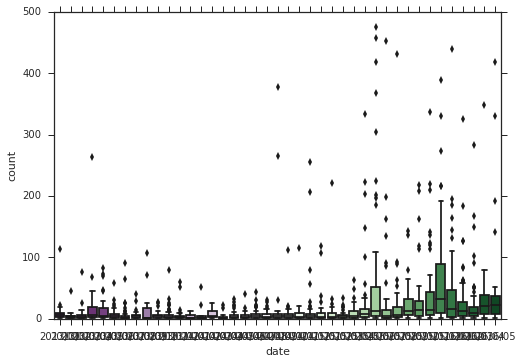

In [85]:
lower_bound = 0
upper_bound = 500
pngFilePath="boxplot2.png"
boxPlotNumofPostPerMonth(fid2,host,lower_bound,upper_bound,pngFilePath)

In [90]:
%matplotlib inline
def pp(o): 
    print json.dumps(o, indent=1)

def boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter):
    data=[]
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
        for fidpid_summary in result.aggs["pid"]["buckets"]:
            if fidpid_summary["doc_count"] < outlierFilter or outlierFilter < 0:
                data.append([fidpid_summary["doc_count"],fid,fidpid_summary["key"]])

    df=pd.DataFrame(data,columns={'count','fid','fidpid'})
    #print data
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="fid", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    fig.savefig(pngFilePath)

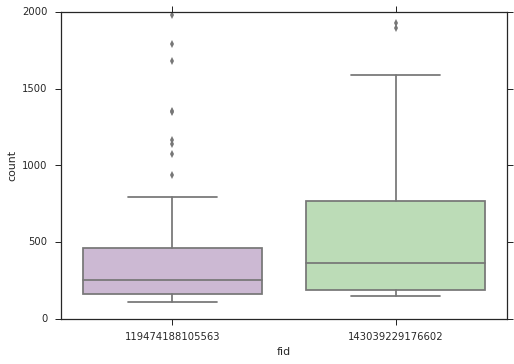

In [91]:
fids=['143039229176602','119474188105563']
pngFilePath3="output.png"

outlierFilter=2000
boxPlotFBFansPageComp(fids,host,pngFilePath3,outlierFilter)

In [119]:
import numpy as np

FIDS2 = [143039229176602,119474188105563]
PostID = ['143039229176602_557278391086015',
          '143039229176602_525569317590256',
          '143039229176602_527394674074387',
          '143039229176602_529428137204374',
          '143039229176602_579364662210721',
          '143039229176602_211266805687177',
          '143039229176602_595162223964298',
          '143039229176602_478371565643365',
          '143039229176602_431631056984083',
          '143039229176602_315673121913211',
          '119474188105563_1150657671653871',
          '119474188105563_1114048741981431',
          '119474188105563_968598386526468',
          '119474188105563_485312648188380',
          '119474188105563_482836958435949',
          '119474188105563_955817441137896',
          '119474188105563_1057866434266329',
          '119474188105563_825288854190756',
          '119474188105563_846198005433174',
          '119474188105563_881871541865820']
#1:與抽獎有關貼文
#0:一般貼文
DataMiningLabel = [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 
                   0, 1, 1, 0, 0, 0, 1, 0, 1, 0]

# F1:Likes>1000  F2:Sharing<100  F3:Comments>200  F4:發文時間在13:00~24:00 F5:發文是附影片
DataMining = np.array([[1, 0, 1, 0, 0],
                       [1, 0, 1, 0, 1],
                       [1, 1, 0, 1, 1],
                       [0, 1, 0, 0, 0],
                       [1, 0, 1, 0, 0],
                       [1, 0, 1, 1, 1],
                       [1, 0, 1, 1, 0],
                       [1, 0, 1, 0, 1],
                       [1, 0, 0, 0, 0],
                       [1, 1, 0, 1, 0],
                       [1, 1, 0, 0, 0],
                       [1, 0, 1, 0, 0],
                       [1, 0, 1, 1, 1],
                       [0, 1, 0, 0, 0],
                       [0, 1, 0, 1, 0],
                       [1, 0, 1, 0, 0],
                       [1, 0, 1, 0, 1],
                       [0, 1, 0, 1, 1],
                       [1, 1, 1, 1, 0],
                       [0, 1, 0, 1, 1]])

print DataMining

[[1 0 1 0 0]
 [1 0 1 0 1]
 [1 1 0 1 1]
 [0 1 0 0 0]
 [1 0 1 0 0]
 [1 0 1 1 1]
 [1 0 1 1 0]
 [1 0 1 0 1]
 [1 0 0 0 0]
 [1 1 0 1 0]
 [1 1 0 0 0]
 [1 0 1 0 0]
 [1 0 1 1 1]
 [0 1 0 0 0]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [1 0 1 0 1]
 [0 1 0 1 1]
 [1 1 1 1 0]
 [0 1 0 1 1]]


In [120]:
from sklearn.cross_validation import train_test_split
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(DataMining, DataMiningLabel, train_size=0.75, random_state=1)

from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)
decision_tree_classifier.score(testing_inputs, testing_classes)

1.0

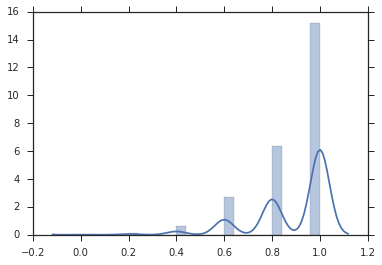

In [121]:
%matplotlib inline
import seaborn as sb

model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(DataMining, DataMiningLabel, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

In [124]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4, 5]}

cross_validation = StratifiedKFold(DataMiningLabel, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(DataMining, DataMiningLabel)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.95
Best parameters: {'max_features': 4, 'max_depth': 1}


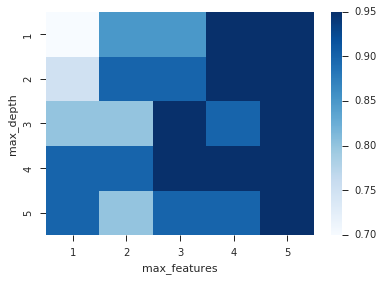

In [125]:
import matplotlib.pyplot as plt
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 5)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(5) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')